# Image resolution

Taka gave me a set of images acquired with the Nikon A1, by using a hybrid detector. There was a similar saturation artefact visible as what we were struggling with on the STED as well. I decided to give it a go here. 

In [17]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom

import supertomo.analysis.resolution.fourier_ring_correlation as frc
import supertomo.ui.frc_options as options
import supertomo.ui.plots.image as showim
import supertomo.data.io.read as read
import supertomo.ui.plots.frc as frcplots

import warnings
warnings.filterwarnings("ignore", message="Polyfit may be poorly conditioned")

data_dir = os.path.join(os.getcwd(), "data/2018_01_29_FRC_Nikon_Taka")
args_list = [data_dir, '--ring-width=4', '--normalize-power', '--frc-curve-fit-degree=8', 
            '--resolution-threshold-criterion=fixed', '--resolution-threshold-value=0.25']

args = options.get_frc_script_options(args_list)

print args

Namespace(directory='/Users/sami/Programming/GIT/supertomo2/notebooks/data/2018_01_29_FRC_Nikon_Taka', frc_curve_fit_degree=8, hanning=False, normalize_power=True, pathout=None, resol_square=False, resolution_point_sigma=0.01, resolution_threshold_criterion='fixed', resolution_threshold_curve_fit_degree=3, resolution_threshold_value=0.25, width_ring=4.0)


## Images

Load a pair of images from the directory in the args_list

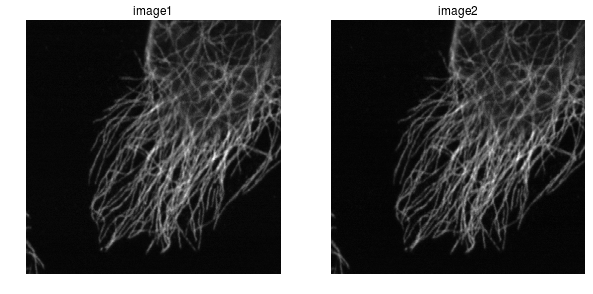

In [18]:
image1_name = 'FRC_GaAsP_AU12.nd2'
image2_name = 'FRC_GaAsP_AU12_.nd2'

image1_path = os.path.join(args.directory, image1_name)
image2_path = os.path.join(args.directory, image2_name)

image1 = read.get_image(image1_path)
image2 = read.get_image(image2_path)

showim.display_2d_images(image1, image2)


## FRC

Run normally with the two images

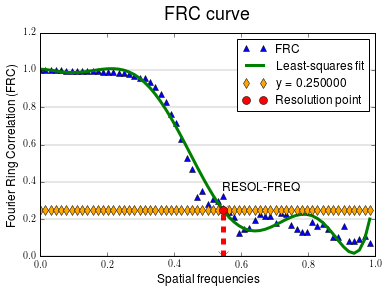

The resolution is: 0.189864826319 um.


In [21]:

frc_task = frc.FRC(image1, image2, args)
results = frc_task.execute()

frcplots.plot_frc_curves(results[0])

results[0].correlation["correlation"][-1]

#results['twosigma'].keys()
#frc.plot_frc_curves(results, mode='fit')

print "The resolution is: %s um." % results[0].resolution['resolution']

The curve above mest certainly says somethings, but it is not at all immediately clear what. I have to go through a larger set of images to figure that one out. Now I just calculated the resolution as the zero crossing of the derivative, which does not seem to be exactly right.


Then I wanted to try the even/odd splitting with the original FRC algorithm as well, as the single pixel shift should still leave enough similarities to work on.

At least in this particular instance, the results look quite promising. I need to try with more images.